In [1]:
import os
import os.path
import random
from operator import add
from datetime import datetime, date, timedelta

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import shutil
import time

from scipy.integrate import simps
from numpy import trapz
from decimal import Decimal, ROUND_DOWN, ROUND_UP

In [2]:
pd.set_option('display.max_columns',69)
pd.set_option('display.max_rows',119)

In [3]:
# load the data
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case1_sattel-hochstuckli\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case2_Atzmaening\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig\setup1'
root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b1339\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b1822\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b2000\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b2500\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case5_champex\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b1564\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b2141\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b2584\setup1'

rootOut = os.path.join(root, 'Results_3')
df_final_tipping_point_1980 = pd.read_csv(os.path.join(rootOut, 'df_final_tipping_point_1980.csv'))
df_final_tipping_point_2020 = pd.read_csv(os.path.join(rootOut, 'df_final_tipping_point_2020.csv'))
df_final_tipping_point_2050 = pd.read_csv(os.path.join(rootOut, 'df_final_tipping_point_2050.csv'))
df_final_tipping_point_2070 = pd.read_csv(os.path.join(rootOut, 'df_final_tipping_point_2070.csv'))

df_policies = pd.read_csv(os.path.join(rootOut, 'df_policies.csv'))

In [4]:
df_final_tipping_point_1980

,tippingPoint26_1980,tippingPoint26_1_1980,scenario26_1980,policy26_1980,tippingPoint45_1980,tippingPoint45_1_1980,scenario45_1980,policy45_1980,tippingPoint85_1980,tippingPoint85_1_1980,scenario85_1980,policy85_1980
0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,3.0,0.0,8.0,0.0,1.0
1,7.0,9.0,0.0,2.0,8.0,7.0,0.0,4.0,8.0,7.0,0.0,8.0
2,9.0,8.0,0.0,6.0,7.0,8.0,0.0,5.0,7.0,9.0,0.0,10.0
3,8.0,7.0,0.0,9.0,8.0,8.0,0.0,7.0,9.0,8.0,0.0,14.0
4,7.0,8.0,0.0,11.0,8.0,8.0,0.0,12.0,8.0,8.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3011,7.0,7.0,44.0,195.0,7.0,8.0,44.0,187.0,NaN,NaN,NaN,NaN
3012,7.0,6.0,44.0,196.0,8.0,4.0,44.0,191.0,NaN,NaN,NaN,NaN
3013,6.0,8.0,44.0,197.0,4.0,8.0,44.0,193.0,NaN,NaN,NaN,NaN
3014,8.0,5.0,44.0,198.0,8.0,8.0,44.0,199.0,NaN,NaN,NaN,NaN


In [5]:
#####Scenario_26####

tippingPoint26_All_1980 = df_final_tipping_point_1980['tippingPoint26_1980'].value_counts()
tippingPoint26_Accepted_1980 = df_final_tipping_point_1980['tippingPoint26_1_1980'].value_counts()
scenario26_1980 = df_final_tipping_point_1980['scenario26_1980'].value_counts()
policy26_1980 = df_final_tipping_point_1980['policy26_1980'].value_counts()

tippingPoint26_All_2020 = df_final_tipping_point_2020['tippingPoint26_2020'].value_counts()
tippingPoint26_Accepted_2020 = df_final_tipping_point_2020['tippingPoint26_1_2020'].value_counts()
scenario26_2020 = df_final_tipping_point_2020['scenario26_2020'].value_counts()
policy26_2020 = df_final_tipping_point_2020['policy26_2020'].value_counts()

tippingPoint26_All_2050 = df_final_tipping_point_2050['tippingPoint26_2050'].value_counts()
tippingPoint26_Accepted_2050 = df_final_tipping_point_2050['tippingPoint26_1_2050'].value_counts()
scenario26_2050 = df_final_tipping_point_2050['scenario26_2050'].value_counts()
policy26_2050 = df_final_tipping_point_2050['policy26_2050'].value_counts()

tippingPoint26_All_2070 = df_final_tipping_point_2070['tippingPoint26_2070'].value_counts()
tippingPoint26_Accepted_2070 = df_final_tipping_point_2070['tippingPoint26_1_2070'].value_counts()
scenario26_2070 = df_final_tipping_point_2070['scenario26_2070'].value_counts()
policy26_2070 = df_final_tipping_point_2070['policy26_2070'].value_counts()

#####Scenario_45####

tippingPoint45_All_1980 = df_final_tipping_point_1980['tippingPoint45_1980'].value_counts()
tippingPoint45_Accepted_1980 = df_final_tipping_point_1980['tippingPoint45_1_1980'].value_counts()
scenario45_1980 = df_final_tipping_point_1980['scenario45_1980'].value_counts()
policy45_1980 = df_final_tipping_point_1980['policy45_1980'].value_counts()

tippingPoint45_All_2020 = df_final_tipping_point_2020['tippingPoint45_2020'].value_counts()
tippingPoint45_Accepted_2020 = df_final_tipping_point_2020['tippingPoint45_1_2020'].value_counts()
scenario45_2020 = df_final_tipping_point_2020['scenario45_2020'].value_counts()
policy45_2020 = df_final_tipping_point_2020['policy45_2020'].value_counts()

tippingPoint45_All_2050 = df_final_tipping_point_2050['tippingPoint45_2050'].value_counts()
tippingPoint45_Accepted_2050 = df_final_tipping_point_2050['tippingPoint45_1_2050'].value_counts()
scenario45_2050 = df_final_tipping_point_2050['scenario45_2050'].value_counts()
policy45_2050 = df_final_tipping_point_2050['policy45_2050'].value_counts()

tippingPoint45_All_2070 = df_final_tipping_point_2070['tippingPoint45_2070'].value_counts()
tippingPoint45_Accepted_2070 = df_final_tipping_point_2070['tippingPoint45_1_2070'].value_counts()
scenario45_2070 = df_final_tipping_point_2070['scenario45_2070'].value_counts()
policy45_2070 = df_final_tipping_point_2070['policy45_2070'].value_counts()

#####Scenario_85####

tippingPoint85_All_1980 = df_final_tipping_point_1980['tippingPoint85_1980'].value_counts()
tippingPoint85_Accepted_1980 = df_final_tipping_point_1980['tippingPoint85_1_1980'].value_counts()
scenario85_1980 = df_final_tipping_point_1980['scenario85_1980'].value_counts()
policy85_1980 = df_final_tipping_point_1980['policy85_1980'].value_counts()

tippingPoint85_All_2020 = df_final_tipping_point_2020['tippingPoint85_2020'].value_counts()
tippingPoint85_Accepted_2020 = df_final_tipping_point_2020['tippingPoint85_1_2020'].value_counts()
scenario85_2020 = df_final_tipping_point_2020['scenario85_2020'].value_counts()
policy85_2020 = df_final_tipping_point_2020['policy85_2020'].value_counts()

tippingPoint85_All_2050 = df_final_tipping_point_2050['tippingPoint85_2050'].value_counts()
tippingPoint85_Accepted_2050 = df_final_tipping_point_2050['tippingPoint85_1_2050'].value_counts()
scenario85_2050 = df_final_tipping_point_2050['scenario85_2050'].value_counts()
policy85_2050 = df_final_tipping_point_2050['policy85_2050'].value_counts()

tippingPoint85_All_2070 = df_final_tipping_point_2070['tippingPoint85_2070'].value_counts()
tippingPoint85_Accepted_2070 = df_final_tipping_point_2070['tippingPoint85_1_2070'].value_counts()
scenario85_2070 = df_final_tipping_point_2070['scenario85_2070'].value_counts()
policy85_2070 = df_final_tipping_point_2070['policy85_2070'].value_counts()

In [6]:
a1 = pd.DataFrame(tippingPoint26_All_1980.reset_index().values, columns=["freq26_tip_all_1980", "tippingPoint26_all_1980"])
a2 = pd.DataFrame(tippingPoint26_Accepted_1980.reset_index().values, columns=["freq26_tipacc_1980", "tippingPoint26_acc_1980"])
a3 = pd.DataFrame(scenario26_1980.reset_index().values, columns=["Policy26_1980", "freq26_1980_policy"])
a4 = pd.DataFrame(policy26_1980.reset_index().values, columns=["scenario26_1980", "freq26_1980_scenario"])

a5 = pd.DataFrame(tippingPoint26_All_2020.reset_index().values, columns=["freq26_tip_all_2020", "tippingPoint26_all_2020"])
a6 = pd.DataFrame(tippingPoint26_Accepted_2020.reset_index().values, columns=["freq26_tipacc_2020", "tippingPoint26_acc_2020"])
a7 = pd.DataFrame(scenario26_2020.reset_index().values, columns=["Policy26_2020", "freq26_2020_policy"])
a8 = pd.DataFrame(policy26_2020.reset_index().values, columns=["scenario26_2020", "freq26_2020_scenario"])

a9 = pd.DataFrame(tippingPoint26_All_2050.reset_index().values, columns=["freq26_tip_all_2050", "tippingPoint26_all_2050"])
a10 = pd.DataFrame(tippingPoint26_Accepted_2050.reset_index().values, columns=["freq26_tipacc_2050", "tippingPoint26_acc_2050"])
a11 = pd.DataFrame(scenario26_2050.reset_index().values, columns=["Policy26_2050", "freq26_2050_policy"])
a12 = pd.DataFrame(policy26_2050.reset_index().values, columns=["scenario26_2050", "freq26_2050_scenario"])

a13 = pd.DataFrame(tippingPoint26_All_2070.reset_index().values, columns=["freq26_tip_all_2070", "tippingPoint26_all_2070"])
a14 = pd.DataFrame(tippingPoint26_Accepted_2070.reset_index().values, columns=["freq26_tipacc_2070", "tippingPoint26_acc_2070"])
a15 = pd.DataFrame(scenario26_2070.reset_index().values, columns=["Policy26_2070", "freq26_2070_policy"])
a16 = pd.DataFrame(policy26_2070.reset_index().values, columns=["scenario26_2070", "freq26_2070_scenario"])

b1= pd.DataFrame(tippingPoint45_All_1980.reset_index().values, columns=["freq45_tip_all_1980", "tippingPoint45_all_1980"])
b2= pd.DataFrame(tippingPoint45_Accepted_1980.reset_index().values, columns=["freq45_tipacc_1980", "tippingPoint45_acc_1980"])
b3= pd.DataFrame(scenario45_1980.reset_index().values, columns=["Policy45_1980", "freq45_1980_policy"])
b4= pd.DataFrame(policy45_1980.reset_index().values, columns=["scenario45_1980", "freq45_1980_scenario"])

b5 = pd.DataFrame(tippingPoint45_All_2020.reset_index().values, columns=["freq45_tip_all_2020", "tippingPoint45_all_2020"])
b6 = pd.DataFrame(tippingPoint45_Accepted_2020.reset_index().values, columns=["freq45_tipacc_2020", "tippingPoint45_acc_2020"])
b7 = pd.DataFrame(scenario45_2020.reset_index().values, columns=["Policy45_2020", "freq45_2020_policy"])
b8 = pd.DataFrame(policy45_2020.reset_index().values, columns=["scenario45_2020", "freq45_2020_scenario"])

b9 = pd.DataFrame(tippingPoint45_All_2050.reset_index().values, columns=["freq45_tip_all_2050", "tippingPoint45_all_2050"])
b10 = pd.DataFrame(tippingPoint45_Accepted_2050.reset_index().values, columns=["freq45_tipacc_2050", "tippingPoint45_acc_2050"])
b11 = pd.DataFrame(scenario45_2050.reset_index().values, columns=["Policy45_2050", "freq45_2050_policy"])
b12 = pd.DataFrame(policy45_2050.reset_index().values, columns=["scenario45_2050", "freq45_2050_scenario"])

b13 = pd.DataFrame(tippingPoint45_All_2070.reset_index().values, columns=["freq45_tip_all_2070", "tippingPoint45_all_2070"])
b14 = pd.DataFrame(tippingPoint45_Accepted_2070.reset_index().values, columns=["freq45_tipacc_2070", "tippingPoint45_acc_2070"])
b15 = pd.DataFrame(scenario45_2070.reset_index().values, columns=["Policy45_2070", "freq45_2070_policy"])
b16 = pd.DataFrame(policy45_2070.reset_index().values, columns=["scenario45_2070", "freq45_2070_scenario"])

c1= pd.DataFrame(tippingPoint45_All_1980.reset_index().values, columns=["freq85_tip_all_1980", "tippingPoint85_all_1980"])
c2= pd.DataFrame(tippingPoint45_Accepted_1980.reset_index().values, columns=["freq85_tipacc_1980", "tippingPoint85_acc_1980"])
c3= pd.DataFrame(scenario45_1980.reset_index().values, columns=["Policy85_1980", "freq85_1980_policy"])
c4= pd.DataFrame(policy45_1980.reset_index().values, columns=["scenario85_1980", "freq85_1980_scenario"])

c5 = pd.DataFrame(tippingPoint45_All_2020.reset_index().values, columns=["freq85_tip_all_2020", "tippingPoint85_all_2020"])
c6 = pd.DataFrame(tippingPoint45_Accepted_2020.reset_index().values, columns=["freq85_tipacc_2020", "tippingPoint85_acc_2020"])
c7 = pd.DataFrame(scenario45_2020.reset_index().values, columns=["Policy85_2020", "freq85_2020_policy"])
c8 = pd.DataFrame(policy45_2020.reset_index().values, columns=["scenario85_2020", "freq85_2020_scenario"])

c9 = pd.DataFrame(tippingPoint45_All_2050.reset_index().values, columns=["freq85_tip_all_2050", "tippingPoint85_all_2050"])
c10 = pd.DataFrame(tippingPoint45_Accepted_2050.reset_index().values, columns=["freq85_tipacc_2050", "tippingPoint85_acc_2050"])
c11 = pd.DataFrame(scenario45_2050.reset_index().values, columns=["Policy85_2050", "freq85_2050_policy"])
c12 = pd.DataFrame(policy45_2050.reset_index().values, columns=["scenario85_2050", "freq85_2050_scenario"])

c13 = pd.DataFrame(tippingPoint85_All_2070.reset_index().values, columns=["freq85_tip_all_2070", "tippingPoint85_all_2070"])
c14 = pd.DataFrame(tippingPoint85_Accepted_2070.reset_index().values, columns=["freq85_tipacc_2070", "tippingPoint85_acc_2070"])
c15 = pd.DataFrame(scenario85_2070.reset_index().values, columns=["Policy85_2070", "freq85_2070_policy"])
c16 = pd.DataFrame(policy85_2070.reset_index().values, columns=["scenario85_2070", "freq85_2070_scenario"])

In [7]:
df_final_tipping_point_1980_2070 = pd.concat((a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16,
                                             b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14, b15, b16,
                                             c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16), axis = 1)
df_final_tipping_point_1980_2070.to_csv(os.path.join(rootOut, 'df_final_tipping_point_1980_2070.csv'), index = False)

In [8]:
df_final_tipping_point_1980_2070.shape

(67, 96)

In [9]:
df_final_tipping_point_1980_2070.head(67)

,freq26_tip_all_1980,tippingPoint26_all_1980,freq26_tipacc_1980,tippingPoint26_acc_1980,Policy26_1980,freq26_1980_policy,scenario26_1980,freq26_1980_scenario,freq26_tip_all_2020,tippingPoint26_all_2020,freq26_tipacc_2020,tippingPoint26_acc_2020,Policy26_2020,freq26_2020_policy,scenario26_2020,freq26_2020_scenario,freq26_tip_all_2050,tippingPoint26_all_2050,freq26_tipacc_2050,tippingPoint26_acc_2050,Policy26_2050,freq26_2050_policy,scenario26_2050,freq26_2050_scenario,freq26_tip_all_2070,tippingPoint26_all_2070,freq26_tipacc_2070,tippingPoint26_acc_2070,Policy26_2070,freq26_2070_policy,scenario26_2070,freq26_2070_scenario,freq45_tip_all_1980,tippingPoint45_all_1980,...,scenario45_2070,freq45_2070_scenario,freq85_tip_all_1980,tippingPoint85_all_1980,freq85_tipacc_1980,tippingPoint85_acc_1980,Policy85_1980,freq85_1980_policy,scenario85_1980,freq85_1980_scenario,freq85_tip_all_2020,tippingPoint85_all_2020,freq85_tipacc_2020,tippingPoint85_acc_2020,Policy85_2020,freq85_2020_policy,scenario85_2020,freq85_2020_scenario,freq85_tip_all_2050,tippingPoint85_all_2050,freq85_tipacc_2050,tippingPoint85_acc_2050,Policy85_2050,freq85_2050_policy,scenario85_2050,freq85_2050_scenario,freq85_tip_all_2070,tippingPoint85_all_2070,freq85_tipacc_2070,tippingPoint85_acc_2070,Policy85_2070,freq85_2070_policy,scenario85_2070,freq85_2070_scenario
0,6.0,530.0,6.0,530.0,43.0,67.0,189.0,45.0,8.0,746.0,4.0,163.0,29.0,36.0,6.0,10.0,8.0,823.0,4.0,113.0,17.0,34.0,13.0,10.0,8.0,933.0,4.0,171.0,29.0,35.0,45.0,11.0,7.0,663.0,...,191.0,2.0,7.0,663.0,7.0,663.0,43.0,67.0,135.0,45.0,9.0,853.0,4.0,108.0,29.0,26.0,110.0,5.0,9.0,1098.0,4.0,12.0,29.0,3.0,166.0,1.0,9.0,2803.0,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,522.0,5.0,522.0,21.0,67.0,68.0,45.0,9.0,617.0,3.0,110.0,17.0,33.0,45.0,10.0,9.0,744.0,3.0,78.0,29.0,31.0,180.0,9.0,7.0,640.0,3.0,95.0,17.0,34.0,88.0,10.0,6.0,647.0,...,12.0,2.0,6.0,647.0,6.0,647.0,21.0,67.0,60.0,45.0,8.0,648.0,3.0,45.0,17.0,25.0,4.0,5.0,8.0,659.0,NaN,NaN,17.0,3.0,90.0,1.0,8.0,155.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7.0,479.0,7.0,479.0,19.0,67.0,91.0,45.0,7.0,573.0,2.0,68.0,37.0,27.0,198.0,9.0,7.0,527.0,2.0,57.0,37.0,25.0,197.0,8.0,6.0,474.0,2.0,58.0,37.0,28.0,66.0,10.0,8.0,479.0,...,124.0,2.0,8.0,479.0,8.0,479.0,19.0,67.0,179.0,45.0,7.0,576.0,2.0,13.0,37.0,21.0,90.0,5.0,10.0,579.0,NaN,NaN,37.0,1.0,94.0,1.0,7.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,8.0,424.0,8.0,424.0,18.0,67.0,145.0,45.0,6.0,385.0,1.0,11.0,25.0,20.0,66.0,9.0,6.0,367.0,1.0,26.0,5.0,19.0,49.0,8.0,5.0,297.0,1.0,49.0,5.0,23.0,49.0,10.0,5.0,376.0,...,110.0,2.0,5.0,376.0,5.0,376.0,18.0,67.0,153.0,45.0,6.0,379.0,1.0,2.0,5.0,14.0,7.0,5.0,7.0,448.0,NaN,NaN,35.0,1.0,106.0,1.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,305.0,4.0,305.0,17.0,67.0,73.0,45.0,5.0,255.0,NaN,NaN,5.0,16.0,13.0,9.0,5.0,230.0,0.0,3.0,25.0,18.0,45.0,7.0,9.0,292.0,0.0,6.0,36.0,21.0,195.0,9.0,4.0,288.0,...,166.0,1.0,4.0,288.0,4.0,288.0,17.0,67.0,184.0,45.0,5.0,232.0,NaN,NaN,25.0,12.0,98.0,5.0,6.0,167.0,NaN,NaN,25.0,1.0,131.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,3.0,254.0,3.0,254.0,16.0,67.0,197.0,45.0,4.0,163.0,NaN,NaN,35.0,16.0,56.0,8.0,4.0,113.0,NaN,NaN,36.0,17.0,143.0,7.0,4.0,171.0,NaN,NaN,6.0,18.0,87.0,9.0,3.0,198.0,...,90.0,1.0,3.0,198.0,3.0,198.0,16.0,67.0,176.0,45.0,10.0,159.0,NaN,NaN,33.0,11.0,5.0,4.0,5.0,52.0,NaN,NaN,22.0,1.0,98.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.0,201.0,2.0,201.0,15.0,67.0,171.0,45.0,3.0,110.0,NaN,NaN,6.0,16.0,88.0,8.0,3.0,78.0,NaN,NaN,33.0,14.0,134.0,7.0,3.0,95.0,NaN,NaN,25.0,18.0,197.0,8.0,9.0,158.0,...,155.0,1.0,9.0,158.0,9.0,158.0,15.0,67.0,144.0,45.0,4.0,108.0,NaN,NaN,36.0,11.0,12.0,4.0,4.0,12.0,NaN,NaN,6.0,1.0,76.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9.0,178.0,9.0,178.0,14.0,67.0,129.0,45.0,10.0,87.0,NaN,NaN,36.0,16.0,9.0,8.0,2.0,57.0,NaN,NaN,35.0,13.0,73.0,6.0,2.0,58.0,NaN,NaN,35.0,16.0,73.0,8.0,2.0,116.0,...,138.0,1.0,2.0,116.0,2.0,116.0,14.0,67.0,136.0,45.0,3.0,45.0,NaN,NaN,6.0,7.0,20.0,4.0,0.0,1.0,NaN,NaN,5.0,1.0,26.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,79.0,1.0,79.0,13.0,67.0,196.0,45.0,2.0,68.

In [10]:
adpation_Option1 = np.array(df_policies['x1SnowThershold'])
adpation_Option2 = np.array(df_policies['xGoodDays'])
all_Policies = []

for i in range(len(adpation_Option1)):
    all_Policies.append('P' + '_' + str(int(adpation_Option1[i])) + '_' + str(int(adpation_Option2[i])))

In [11]:
#all_Policies

In [12]:
#df_final_tipping_point_1980_2070['Policy26_2020'] = df_final_tipping_point_1980_2070['Policy26_2020'].apply(lambda x: 'Plc_' + str(x))

In [13]:
#df_final_tipping_point_1980_2070['Policy26_2050'] = df_final_tipping_point_1980_2070['Policy26_2050'].apply(lambda x: 'Plc_' + str(x))

In [14]:
#df_final_tipping_point_1980_2070['Policy26_2070'] = df_final_tipping_point_1980_2070['Policy26_2070'].apply(lambda x: 'Plc_' + str(x))

In [15]:
x_26 = df_final_tipping_point_1980_2070.loc[0:38, 'Policy26_2020'].to_list()
y_26 = df_final_tipping_point_1980_2070.loc[0:38, 'freq26_2020_policy'].to_list()
x1_26 = df_final_tipping_point_1980_2070.loc[0:32, 'Policy26_2050'].to_list()
y1_26 = df_final_tipping_point_1980_2070.loc[0:32, 'freq26_2050_policy'].to_list()
x2_26 = df_final_tipping_point_1980_2070.loc[0:40, 'Policy26_2070'].to_list()
y2_26 = df_final_tipping_point_1980_2070.loc[0:40, 'freq26_2070_policy'].to_list()

In [16]:
x_45 = df_final_tipping_point_1980_2070.loc[0:22, 'Policy45_2020'].to_list()
y_45 = df_final_tipping_point_1980_2070.loc[0:22, 'freq45_2020_policy'].to_list()
x1_45 = df_final_tipping_point_1980_2070.loc[0:7, 'Policy45_2050'].to_list()
y1_45 = df_final_tipping_point_1980_2070.loc[0:7, 'freq45_2050_policy'].to_list()
x2_45 = df_final_tipping_point_1980_2070.loc[0:8, 'Policy45_2070'].to_list()
y2_45 = df_final_tipping_point_1980_2070.loc[0:8, 'freq45_2070_policy'].to_list()

In [17]:
x_85 = df_final_tipping_point_1980_2070.loc[0:22, 'Policy85_2020'].to_list()
y_85 = df_final_tipping_point_1980_2070.loc[0:22, 'freq85_2020_policy'].to_list()
x1_85 = df_final_tipping_point_1980_2070.loc[0:7, 'Policy85_2050'].to_list()
y1_85 = df_final_tipping_point_1980_2070.loc[0:7, 'freq85_2050_policy'].to_list()
x2_85 = df_final_tipping_point_1980_2070.loc[0:0, 'Policy85_2070'].to_list()
y2_85 = df_final_tipping_point_1980_2070.loc[0:0, 'freq85_2070_policy'].to_list()

In [18]:
x2_85

[nan]

In [19]:
y2_85

[nan]

In [20]:
#y.reverse()

In [21]:
x_26_arr = np.array(x_26) - 0.25
x1_26_arr = np.array(x1_26)
x2_26_arr = np.array(x2_26) + 0.25

In [22]:
x_26_arr

array([28.75, 16.75, 36.75, 24.75,  4.75, 34.75,  5.75, 35.75, 32.75,
       13.75, 14.75,  2.75, 43.75,  1.75, 21.75, 39.75,  6.75, 23.75,
       11.75, 22.75, 33.75, 27.75, 12.75, 42.75, 40.75, 25.75, 26.75,
       15.75, 20.75,  3.75, 41.75, 18.75, 19.75, 10.75,  7.75, 30.75,
       37.75,  0.75, 29.75])

In [41]:
title_Figs = 'case4_Les Diablerets (1339m)'

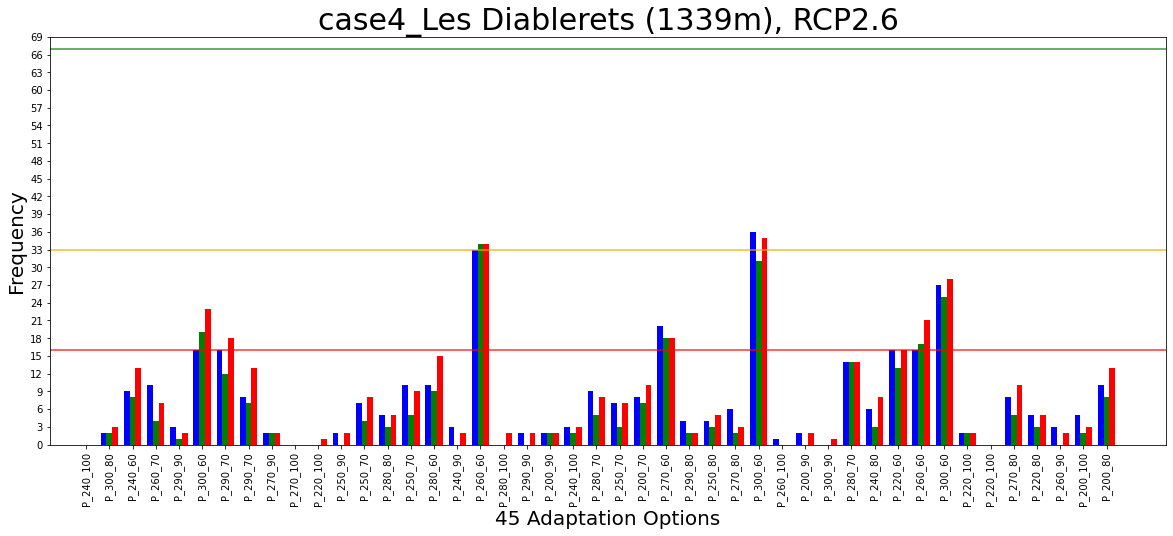

In [42]:
fig35, ax1 = plt.subplots(figsize=(20,7.5))

width = 0.25

ax1.bar(x_26_arr, y_26, width = width, color = 'Blue', label = "2020")
ax1.bar(x1_26_arr, y1_26, width = width, color = 'Green', label = "2050")
ax1.bar(x2_26_arr, y2_26, width = width, color = 'Red', label = "2070")


#X-Axis
xticks = np.arange(0, 45, 1)
ax1.set_xticks(xticks)
#ax1.set_xticks(xticks, all_Policies)

xlabels = all_Policies
#ax1.set_xticklabels(xlabels)
#plt.setp(ax1.get_xticklabels(), rotation=60, size = 10, ha="right", rotation_mode="anchor")
#plt.setp(ax1.get_xticklabels(), rotation=60, size = 10)
plt.xticks(xticks, xlabels, fontsize=16)
plt.setp(ax1.get_xticklabels(), rotation=90, size = 10)



#Y-Axis
yticks = np.arange(0, 70, 3)
#ax1.set_yticks(yticks)
#plt.setp(ax1.get_yticklabels(), rotation=0, size = 15, ha="right", rotation_mode="anchor")

ax1.set_yticks(yticks)
ax1.set_title(title_Figs + ', RCP2.6', size = 30)
ax1.set_xlabel('45 Adaptation Options', size = 20)
ax1.set_ylabel('Frequency', size = 20)


ax1.axhline(y=67, color='green', alpha=0.8)
ax1.axhline(y=33, color='orange', alpha=0.8)
ax1.axhline(y=16, color='red', alpha=0.8)
#ax1.set_ylim(bottom=0, top =70)
#ax1.y_axis = np.arange(0, 70)

fig35.savefig(os.path.join(rootOut, 'tipping_point_All_new_3_RCP26.tiff'), format='tiff', dpi=150)

In [43]:
x_45_arr = np.array(x_45) - 0.25
x1_45_arr = np.array(x1_45)
x2_45_arr = np.array(x2_45) + 0.25

In [44]:
y2_45

[6.0, 5.0, 4.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0]

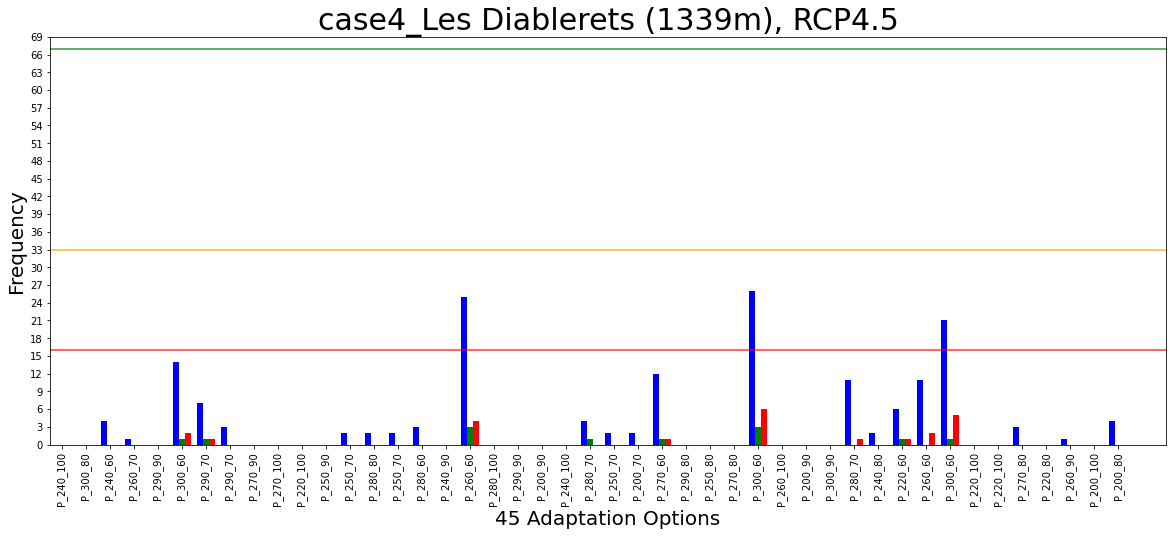

In [45]:
fig36, ax1 = plt.subplots(figsize=(20,7.5))

width = 0.25

ax1.bar(x_45_arr, y_45, width = width, color = 'Blue', label = "2020")
ax1.bar(x1_45_arr, y1_45, width = width, color = 'Green', label = "2050")
ax1.bar(x2_45_arr, y2_45, width = width, color = 'Red', label = "2070")


#X-Axis
xticks = np.arange(0, 45, 1)
ax1.set_xticks(xticks)
#ax1.set_xticks(xticks, all_Policies)

xlabels = all_Policies
#ax1.set_xticklabels(xlabels)
#plt.setp(ax1.get_xticklabels(), rotation=60, size = 10, ha="right", rotation_mode="anchor")
#plt.setp(ax1.get_xticklabels(), rotation=60, size = 10)
plt.xticks(xticks, xlabels, fontsize=16)
plt.setp(ax1.get_xticklabels(), rotation=90, size = 10)



#Y-Axis
yticks = np.arange(0, 70, 3)
#ax1.set_yticks(yticks)
#plt.setp(ax1.get_yticklabels(), rotation=0, size = 15, ha="right", rotation_mode="anchor")

ax1.set_yticks(yticks)
ax1.set_title(title_Figs + ', RCP4.5', size = 30)
ax1.set_xlabel('45 Adaptation Options', size = 20)
ax1.set_ylabel('Frequency', size = 20)

ax1.axhline(y=67, color='green', alpha=0.8)
ax1.axhline(y=33, color='orange', alpha=0.8)
ax1.axhline(y=16, color='red', alpha=0.8)
#ax1.set_ylim(bottom=0, top =70)
#ax1.y_axis = np.arange(0, 70)
fig36.savefig(os.path.join(rootOut, 'tipping_point_All_new_3_RCP45.tiff'), format='tiff', dpi=150)

In [37]:
x_85_arr = np.array(x_85) - 0.25
x1_85_arr = np.array(x1_85)
x2_85_arr = np.array(x2_85) + 0.25

In [38]:
y2_85

[nan]

In [39]:
x2_85_arr

array([nan])

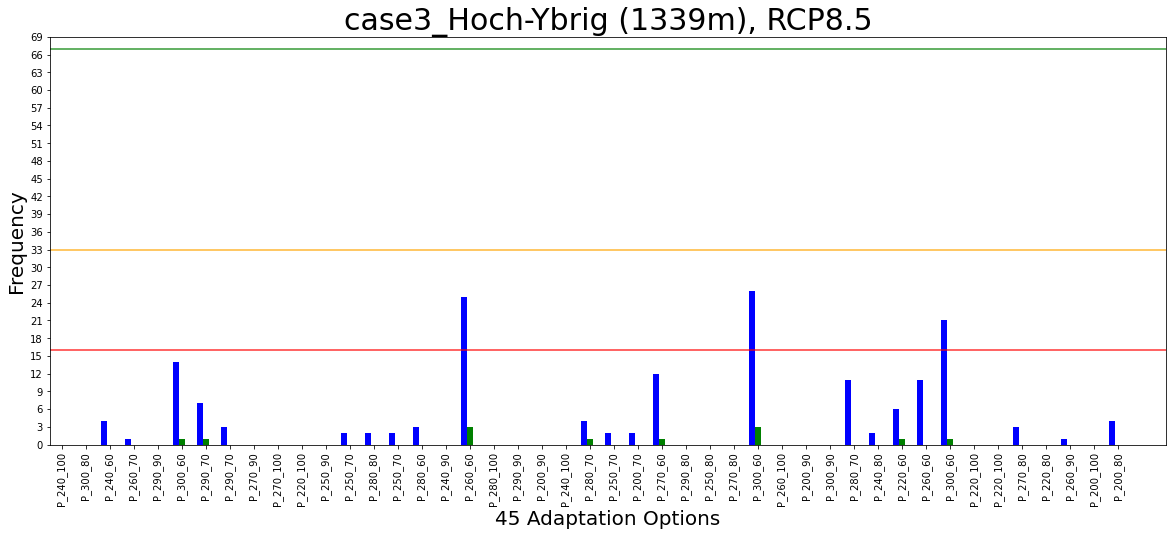

In [40]:
fig37, ax1 = plt.subplots(figsize=(20,7.5))

width = 0.25

ax1.bar(x_85_arr, y_85, width = width, color = 'Blue', label = "2020")
ax1.bar(x1_85_arr, y1_85, width = width, color = 'Green', label = "2050")
ax1.bar(x2_85_arr, y2_85, width = width, color = 'Red', label = "2070")


#X-Axis
xticks = np.arange(0, 45, 1)
ax1.set_xticks(xticks)
#ax1.set_xticks(xticks, all_Policies)

xlabels = all_Policies
#ax1.set_xticklabels(xlabels)
#plt.setp(ax1.get_xticklabels(), rotation=60, size = 10, ha="right", rotation_mode="anchor")
#plt.setp(ax1.get_xticklabels(), rotation=60, size = 10)
plt.xticks(xticks, xlabels, fontsize=16)
plt.setp(ax1.get_xticklabels(), rotation=90, size = 10)



#Y-Axis
yticks = np.arange(0, 70, 3)
#ax1.set_yticks(yticks)
#plt.setp(ax1.get_yticklabels(), rotation=0, size = 15, ha="right", rotation_mode="anchor")

ax1.set_yticks(yticks)
ax1.set_title(title_Figs + ', RCP8.5', size = 30)
ax1.set_xlabel('45 Adaptation Options', size = 20)
ax1.set_ylabel('Frequency', size = 20)

ax1.axhline(y=67, color='green', alpha=0.8)
ax1.axhline(y=33, color='orange', alpha=0.8)
ax1.axhline(y=16, color='red', alpha=0.8)
#ax1.set_ylim(bottom=0, top =70)
#ax1.y_axis = np.arange(0, 70)
fig37.savefig(os.path.join(rootOut, 'tipping_point_All_new_3_RCP85.tiff'), format='tiff', dpi=150)